In [1]:
#Importamos las bibliotecas
from math import cos
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
#Arreglos que contienen cada una de las gráficas
w = []
graf = []

        
#Definimos las ecuaciones diferenciales y los parámetros
def f(t, z, p):
    """"
        Lado derecho de las ecuaciones diferenciales
        dx/dt = y
        dy/dt = - δ*y - α*x - β*x**3 + γ*cos(ω*t)

    """
    δ, α, β, γ, ω = p                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return f

#Creamos una instancia para resolver la ecuación diferencial a través del método 'dopri5'
solver = ode(f)
solver.set_integrator('dopri5')

#Especificamos los valores de β
βj = [-0.003,0.0000000001,0.01,0.04]

for j in range (0,len(βj)):

    #Arreglos para cada valor de w y x
    wi=[]
    grafi=[]

    for i in range(0,251):

        #Especificamos los parámetros de la ecuación a nuestra función
        γ = 1.0
        α = 1.0        
        δ = 0.1
        ω = i*0.01
        β = βj[j]
        #β=0.04
        val = δ, α, β, γ, ω                      
        solver.set_f_params(val)

        # Fijamos el valor inical z(0) = z0
        t0 = 0.0
        z0 = [1.0, 0]
        solver.set_initial_value(z0, t0)

        #Creamos un arreglo de valores de tiempo t para los cuales evalue la solución; creamos también un arreglo que 
        #almacene los valores obtenidos
        t1 = 40
        n = 400
        t = np.linspace(t0, t1, n)
        sol = np.empty((n, 2))
        sol[0] = z0

        #Llamamos repetidamente al integrador para que avance en la solución un tiempo 'k'
        k = 1

        while solver.successful() and solver.t < t1:
            solver.integrate(t[k])
            sol[k] = solver.y
            k += 1

        x = sol[:,0]

        wi.append(ω)
        grafi.append(max(abs(x)))

    #Almacenamos todos los arreglos
    w.append(wi)
    graf.append(grafi)

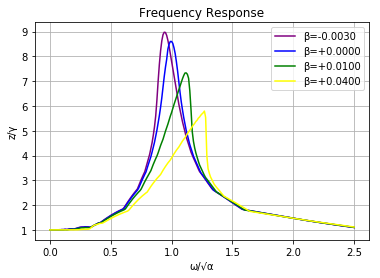

In [3]:
#Graficamos las soluciones
plt.plot(w[0],graf[0], color="purple",label="β=-0.0030")
plt.plot(w[1],graf[1], color="blue",label="β=+0.0000")
plt.plot(w[2],graf[2], color="green",label="β=+0.0100")
plt.plot(w[3],graf[3], color="yellow",label="β=+0.0400")

plt.legend()
plt.grid()
plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.grid(True)
plt.title('Frequency Response')
plt.savefig('DE.png', dpi=100)

In [4]:
def f(t, z, omega):
    #Right hand side of the differential equations
    #  dx/dt = y
    #  dy/dt = omega * x
    δ, α, β, γ, ω = omega                           #Parámetros de nuestra integral
    x, y = z                                    #Parámetros de integración
    f = [y, - δ*y - α*x - β*x**3 + γ*cos(ω*t)]  #Función a integrar

    return f

In [5]:
# Create an `ode` instance to solve the system of differential
# equations defined by `fun`, and set the solver method to 'dopri5' or "dopri5".
solver = ode(f)
solver.set_integrator('dopri5')

In [6]:
# Give the value of omega to the solver. This is passed to
# `fun` when the solver calls it.
#omega = 2 * np.pi
#solver.set_f_params(omega)

In [7]:
# Create the array `t` of time values at which to compute
# the solution, and create an array to hold the solution.
# Put the initial value in the solution array.
w1=[]
gf1=[]
for i in range(0,200):
    
    γ = 1.0
    α = 1.0        
    δ = 0.1
    ω = i*0.01
    β = 0.04

    val = δ, α, β, γ, ω                      
    solver.set_f_params(val)

    # Create the array `t` of time values at which to compute
    # the solution, and create an array to hold the solution.
    # Put the initial value in the solution array.
    t0 = 0.0
    z0 = [1.0, 0]
    solver.set_initial_value(z0, t0)

    # Repeatedly call the `integrate` method to advance the
    # solution to time t[k], and save the solution in sol[k].
    t1 = 40
    n = 400
    t = np.linspace(t0, t1, n)
    sol = np.empty((n, 2))
    sol[0] = z0

    k = 1

    while solver.successful() and solver.t < t1:
        solver.integrate(t[k])
        sol[k] = solver.y
        k += 1

    x = sol[:,0]

    w1.append(ω)
    gf1.append(max(abs(x)))

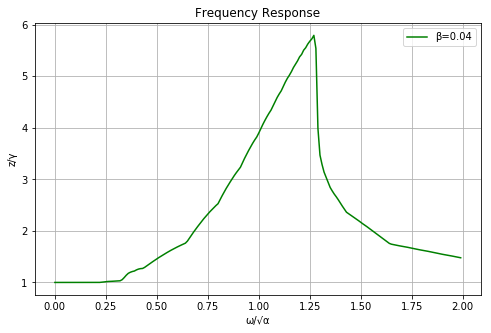

In [8]:
# Plot the solution...

plt.figure(figsize=(8, 5))

plt.plot(w1, gf1, label="β=0.04", color="green")

plt.legend()
plt.grid()
plt.xlabel("ω/√α")
plt.ylabel("z/γ")
plt.grid(True)
plt.title('Frequency Response')
plt.savefig('DEFR.png', dpi=100)